From: https://github.com/ksatola

# Classification of iris flowers
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

- Description: https://archive.ics.uci.edu/ml/datasets/Iris
- Downloaded from: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

## Problem
Build a recognition engine to predict an iris class (predict species from flower measurements).

## Dataset attributes
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
-- Iris Setosa 
-- Iris Versicolour 
-- Iris Virginica

More on the dataset: [iris.names](iris.names)

# Imports

In [1]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from pickle import dump
from pickle import load

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from numpy import set_printoptions
pd.set_option('display.width', 100)
pd.set_option('precision', 5)

# Load the dataset

In [2]:
# Load dataset
filename = 'iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(filename, names=names)

# Summarize the dataset

In [3]:
# Dimensions of the dataset
df.shape

(150, 5)

There are 150 instances (observations) and 5 attributes (variables, features).

In [4]:
# Peek at the data itself
#df.head(20)
df.sample(10)

,sepal-length,sepal-width,petal-length,petal-width,class
90,5.5,2.6,4.4,1.2,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
146,6.3,2.5,5.0,1.9,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa
17,5.1,3.5,1.4,0.3,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
14,5.8,4.0,1.2,0.2,Iris-setosa
115,6.4,3.2,5.3,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [6]:
# Are there any missing values?
df.isnull().values.any()

False

In [7]:
# Statistical summary of all attributes
df.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.00000,150.00000,150.00000,150.00000
mean,5.84333,3.05400,3.75867,1.19867
std,0.82807,0.43359,1.76442,0.76316
min,4.30000,2.00000,1.00000,0.10000
25%,5.10000,2.80000,1.60000,0.30000
50%,5.80000,3.00000,4.35000,1.30000
75%,6.40000,3.30000,5.10000,1.80000
max,7.90000,4.40000,6.90000,2.50000


All the numerical values have the same scale (cm) and similar ranges between 0 and 8 cm.

In [8]:
# Breakdown of the data by the class variable
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Each class has the same number of instances 50 (33% of the dataset).

## Observations
- All independent attributes are numeric.
- It is a classification problem where supervised learning techniques should be used to predict the iris class.
- It is a multiclass classification problem (multi-nominal) that may require some specialized handling.
- It only has 4 attributes and 150 rows.
- All of the numeric attributes are in the same units and the same scale not requiring any special scaling or transforms to get started.

# Visualize the dataset

## Univariate plots

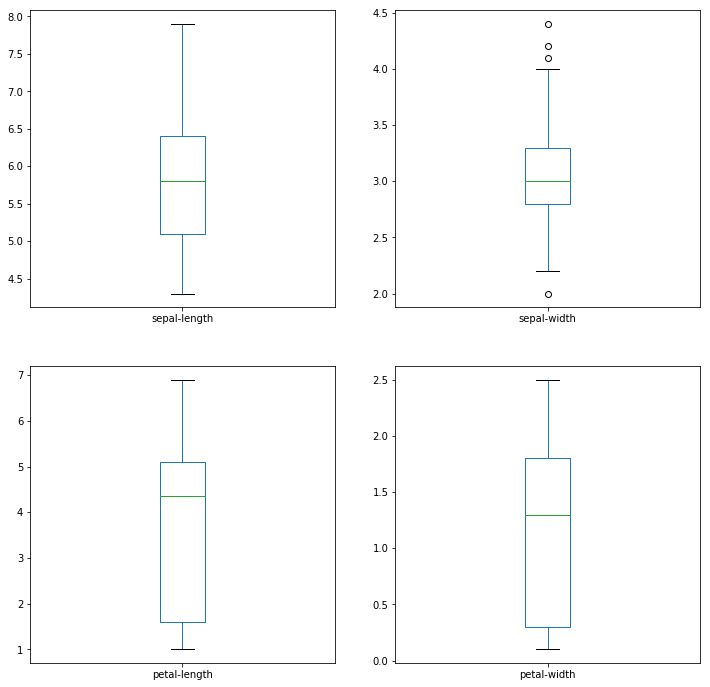

In [9]:
# Box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(12,12));

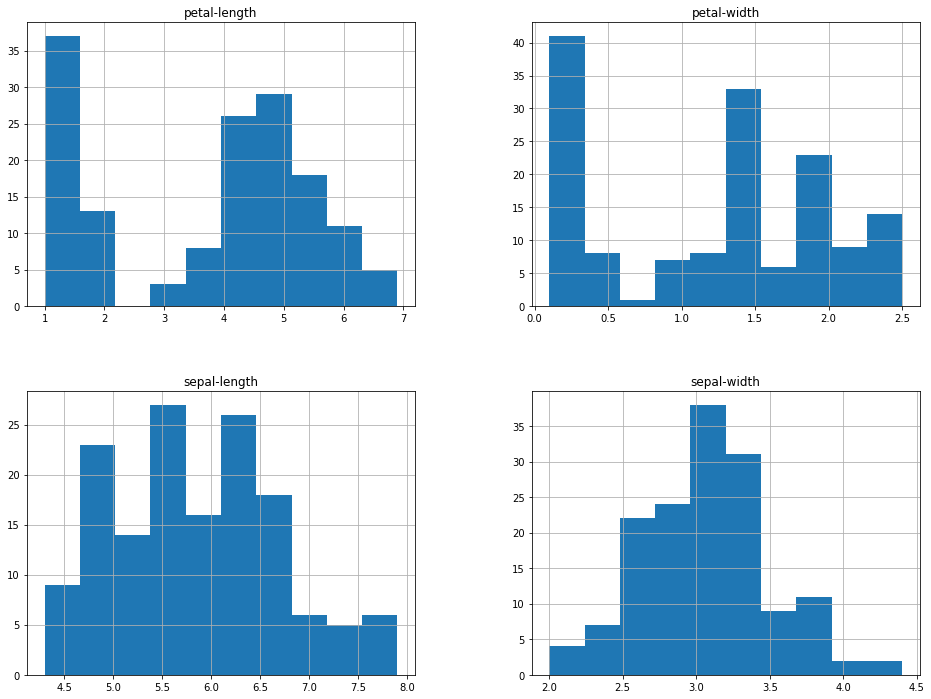

In [10]:
# Histograms
df.hist(figsize=(16,12));

Sepal-length and sepal-width have distributions close to Gaussian.

## Multivariate plots

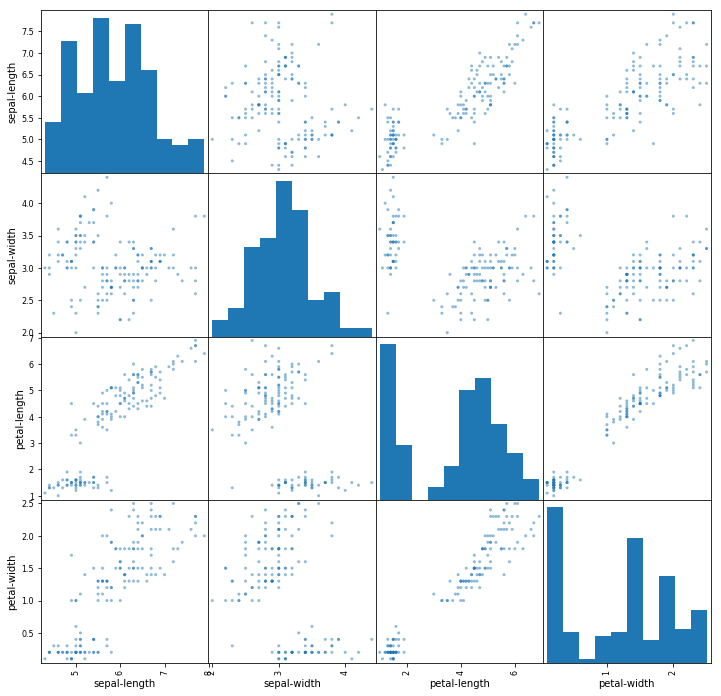

In [11]:
# Scatter plot matrix
scatter_matrix(df, figsize=(12,12));

In [12]:
# Pearson’s Correlation Coefficient assumes a normal distribution of the attributes involved.
df.corr(method='pearson')

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.00000,-0.10937,0.87175,0.81795
sepal-width,-0.10937,1.00000,-0.42052,-0.35654
petal-length,0.87175,-0.42052,1.00000,0.96276
petal-width,0.81795,-0.35654,0.96276,1.00000


Petal-length and petal-width are strongly correlated. Sepal-lenght is also strongly correlated with petal-length and petal-width.

# Evaluate algorithms

LR: 95.83333333333333 (4.16666666666667)
LDA: 97.5 (3.818813079129868)
KNN: 98.33333333333331 (3.333333333333335)
CART: 98.33333333333331 (3.333333333333335)
NB: 97.5 (5.3359368645273735)
SVM: 99.16666666666666 (2.5000000000000013)


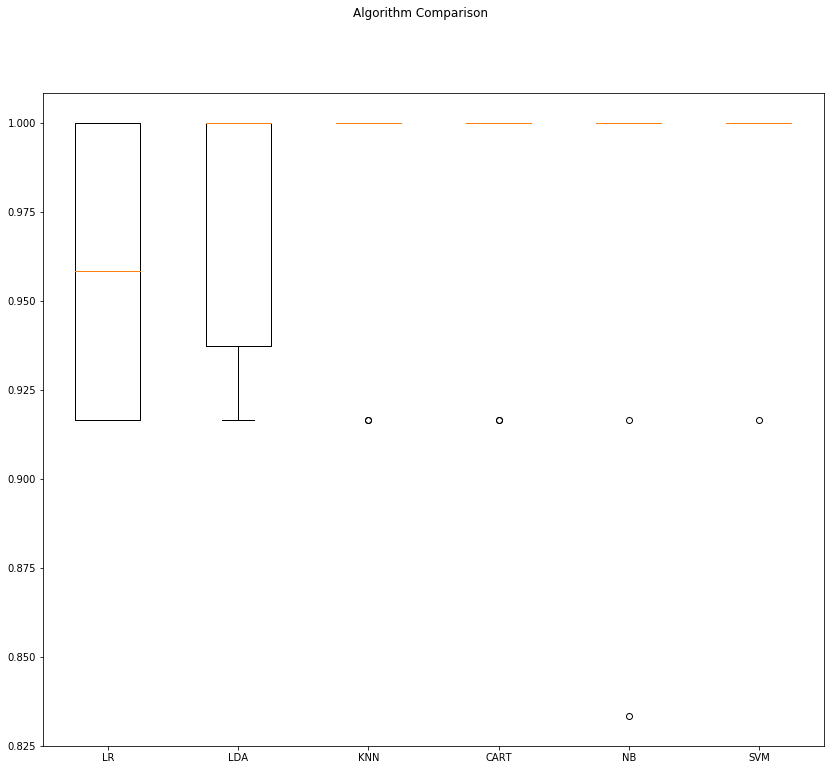

In [13]:
# Create some models of data and estimate their accuracy on unseen data

# Separate out a validation dataset
arr = df.values
X = arr[:,0:4]
y = arr[:,4]
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)

# Build 5 different models to predict species from flower measurements (spot-check algorithms)
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200, multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

# Evaluate each model in turn
# Setup the test harness to use 10-fold cross validation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #print("Estimated accuracy of {} with the mean of {} and std. dev. {}".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))
    print("{}: {} ({})".format(name, cv_results.mean()*100.0, cv_results.std()*100.0))

# Create a plot of the model evaluation results to compae the spread 
# and the estimated mean accuracy of each model
fig = plt.figure(figsize=(14,12)) 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

It seems that SVM has largest estimated accuracy score. The box plots are squashed at the top of the range, with many samples achieving 100% accuracy.

# Make predictions

In [14]:
# Select the best model
# Perform an independent final check on its accuracy
clf = SVC(gamma='scale')
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)

print('Accuracy score: {}'.format(accuracy_score(Y_test, pred)))
print('\nConfusion matrix:\n {}'.format(confusion_matrix(Y_test, pred)))
print('\nClassification report:\n {}'.format(classification_report(Y_test, pred)))

Accuracy score: 0.9

Confusion matrix:
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



# Save results

In [15]:
# Save the model to disk
filename = 'finalized_model.sav' 
dump(clf, open(filename, 'wb'))

# Some time later...
# Load the model from disk
loaded_clf = load(open(filename, 'rb'))
result = loaded_clf.score(X_test, Y_test)
print(result)

0.9
